# CDCs

- Clock domain is all seq logic (flops, rams) that run at one clock freq, occasionally need multiple (talk about why need multiple)
- setup and hold times cannot be guaranteed across clk boundaries
- setup time is time before clk edge when data must be unchanging, hold time is time after clk edge when data must be unchanging. Metastability is what happens when that's violated
- So data needs to be stable during setup and hold time around clk edge
- slow to fast
    - 2FF, if level signal - output of second flop is stable, first flop is metastable
    - If want to detect rising edge, do 3ff
    - check if 3ff==0 and 2ff==1, then rising edge detected!
- fast to slow
    - more difficult case
    - If want to detect a pulse, have to stretch the incoming fast domain signal long enough so the slow domain can see it
    - Need to know the frequency of fast and slow clk domains
    - Ex, if have 100MHz -> 25MHz, rule of thumb is (fast/slow) * 2 = (100/25)*2 = 8
    - How to stretch signal in fast clk domain (this is all clked logic in fast domain!):
        - When see the fast_pulse_in == 1, set a decrementing cntr=8
        - Decrement it every clk cycle after it's been set
        - Set false_pulse_out = (cntr > 0) 1 : 0
    - Then, sample the signal in the slow domain with a 2ff. Use the output of the 2ff.
- using FIFOs
    - Want this for streaming data. Multi-bit data bus or single bit, apparently? Check me.
    - FIFO is a BRAM in FPGA, dedicated piece of logic in FPGA. TODO: watch NANDland's video about FIFOs
    - Ex: sending data every clk cycle from slow to fast, say 33MHz to 50MHz, because the pulling domain is faster than the pushing
    - If crossing fast to flow -> either need to take breaks when sending (duty cycle maybe, every other clk edge, or do a quick burst of data), or expand the bus in the slow domain
    - Ex: video processing -> process one row at a time, with dead time in between to allow to process
- level signals vs pulses
    - Read more about this, look at handshakes etc
- Timing errors
    - Need to write timing constraints to get errors to go away
    - Timing violations can be real, or just need constraints -> not so sure this is correct
- CDC IPs
    - In Vivado : https://docs.amd.com/r/en-US/ug953-vivado-7series-libraries/XPM_CDC_ARRAY_SINGLE
- References
    - https://nandland.com/lesson-14-crossing-clock-domains/
    - http://www.sunburst-design.com/papers/CummingsSNUG2008Boston_CDC.pdf
    - http://www.sunburst-design.com/systemverilog_training/SystemVerilog_Courses/SystemVerilog_Expert_CDC_FIFO_1day.pdf
    

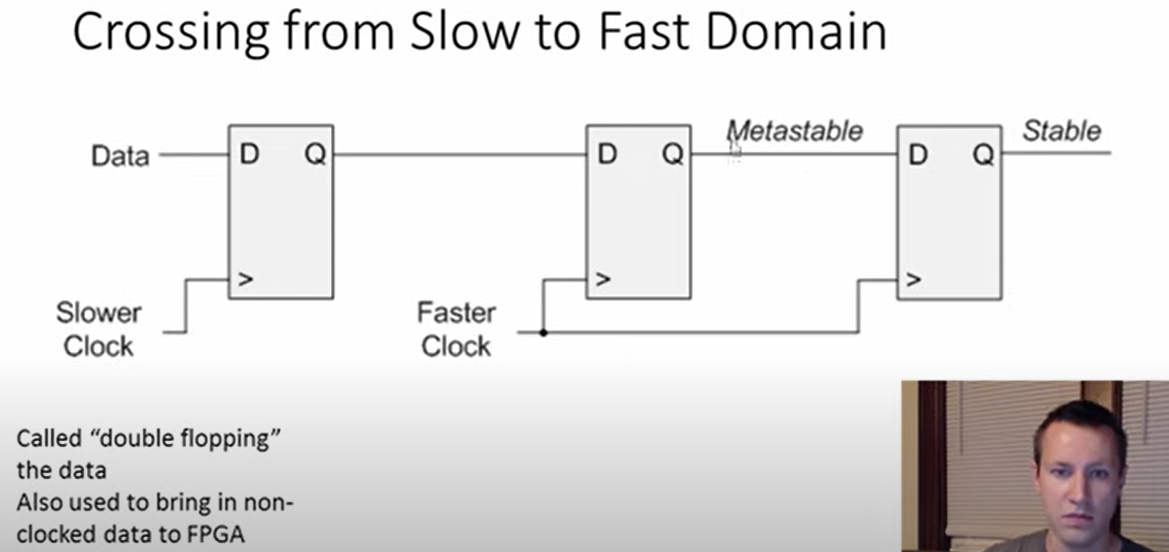

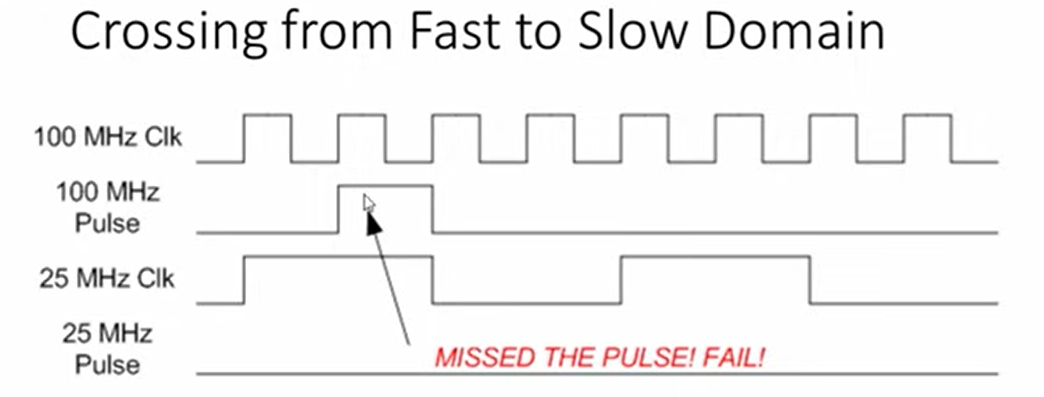

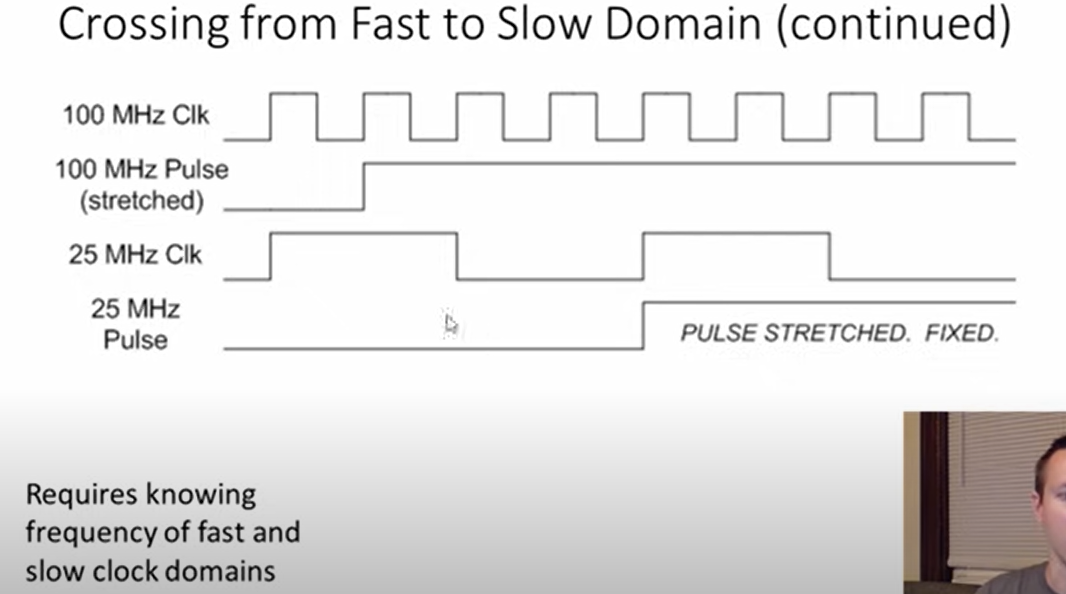

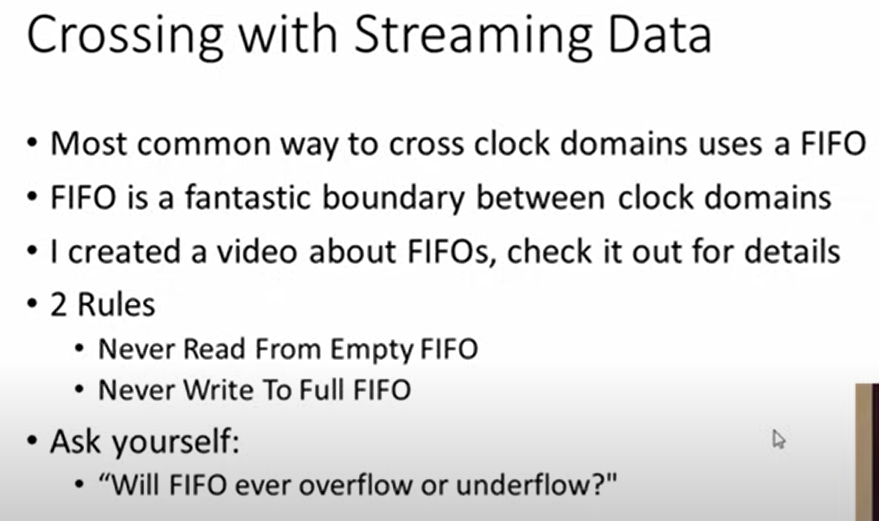

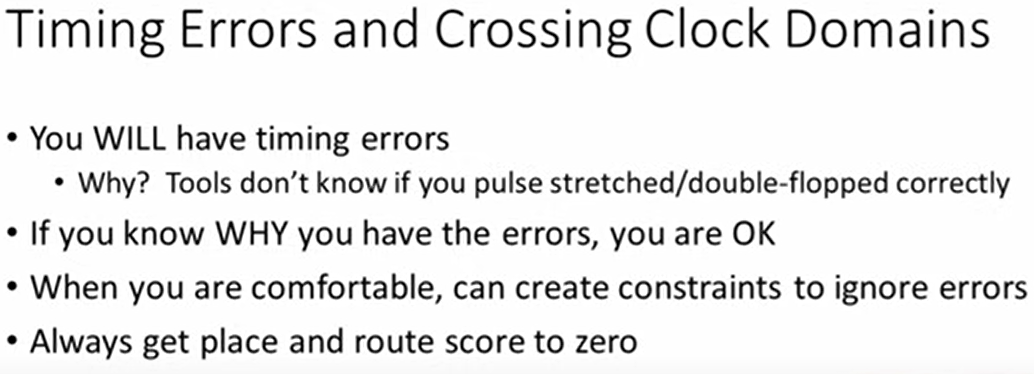

- How to choose an FPGA
    - IOs required, resources required (LUTs, BRAMs, DSPs, operating frequency)
    - Look at memory user guide for a design to see how to instantiate BRAMs expected
    - look at IO speed on data sheet, different speed grades usually exist for a given FPGA
    - temperature ratings
    - Power, if design runs off batteries, is heat going to be a problem, check the tools for power estimation
    - They check this thru clk speed, how many rsrcs you are using, and whether youre using external interfaces
    - For example driving SERDES - high speed takes a lot of power
    - Hard IP blocks - SDRAM IF, built in microcontroller, SERDES, etc
    - Does an FPGA make sense? Sometimes microcontroller better idea (cheap, easy)
    - Vendors -> Xilinx (AMD), Altera (Intel), Lattice, Microsemi (was previously Atmel)
    - Boot times (instant on flash based FPGAs vs SRAM based)
    - BGA (ball grid array) Top Quad Flat Pack (TQFP) -> board area, size
    - Ball pitch, the width in mm between two balls between two balls on a BGA (0.3-0.4mm)
    - Look at product table/selector guide


- Simple interfaces 
    - I2C https://youtu.be/jFtr0Ha5f-c?si=g87QorIDbPmRrwtZ
        - pull up resistors for SDA and SCL lines. 
        - SDA -> data, SCL -> clk. Serial. 
        - Low pin count, addressing for slaves built in (as opposed to chip select for SPI)
        - Bad things: half duplex (only master or slave can talk once), limited on bandwidth. Limited to 400kbps max (sorta_
        -  more complicated than SPI or UART
        - If two slaves have the same address and both try to talk back, the return data will collide
        - Start condition: data goes low, then clk goes low. Master initates this.
        - data is always 8b wide
        - master drives address first and read/write bit, then data on the same bus if it's a write
        - if it's a read slave drives data on the same bus
        - to end, SCL goes high, then SDA goes high
        - 4.7kOhms is OK -> if longer runs, need bigger resistors
        - Generally tops out around 400kbps, but can get 1MHz, 3.4MHz and 5MHz if really need, very uncommon
        - uncommon, can get multiple masters
       
        
    - For UART, you have to build addressing in another layer on top. 
        - slower than I2C
        - asynchronous because there is no clock. Usually top out at 1Mbps, (1MHz)
    - SPI 
        - faster than I2C and UART
        - Synchronous means there is a clk! serial parallel interface. CLocked interfaces can go faster
        - memory chips, SD cards, EPROMs, microcontrollers, IO expanders, display modules (LCD, OLED), ADCs
        - SCLK, MOSI, MISO, SS (slave select/chip select)
        - full duplex, because MOSI and MISO
        - more pins than UART or I2C. 4pins minimum, if more slaves, more slave selects. 
        - can only go short distances (up to 1m at most) compared to RS-232/485) can go like a quarter mile
            - because it's single ended interface, not differential
        - can go decently fast, like 16MHz, 32MHz etc
        
- Interview Qs https://youtu.be/9U9R4IxIACs?si=cnLWtuUf9b4pJ3c-
- FPGA clk https://youtu.be/htwlb-DuEK8?si=9QODl1lBdCviLzvU
- transistor (mosfet/bjt)
- synchronous vs asynchronous reset



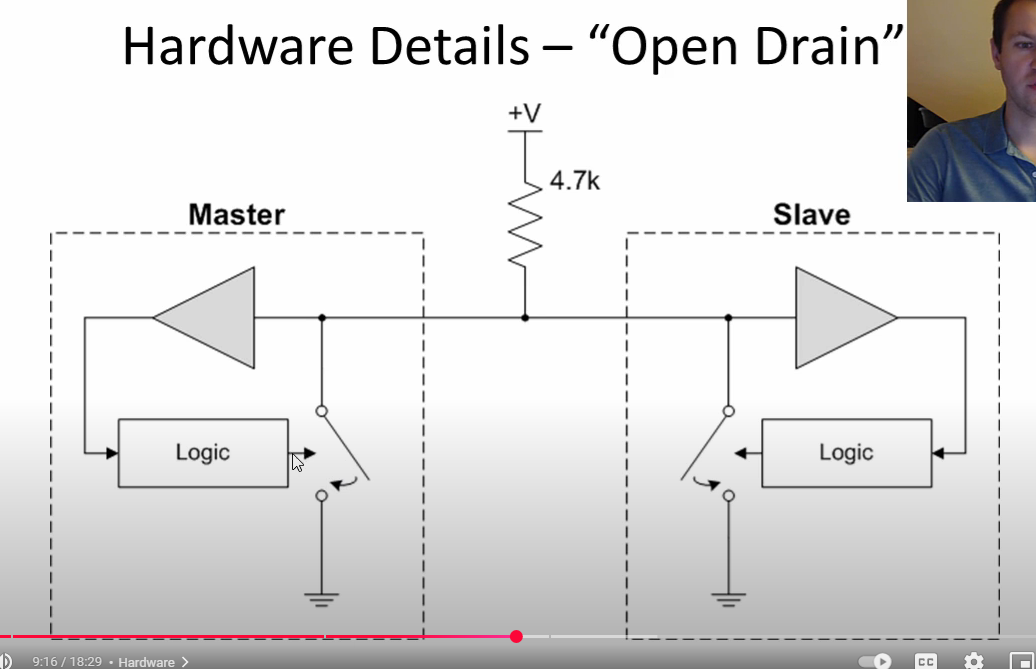

- open switch, bus at 3.3V. CLosed switch, bus at 0V
### I2C
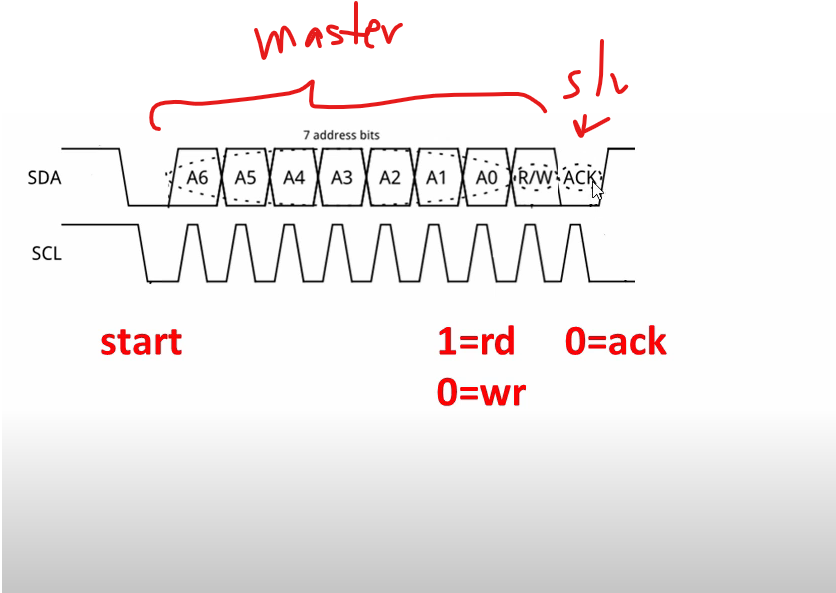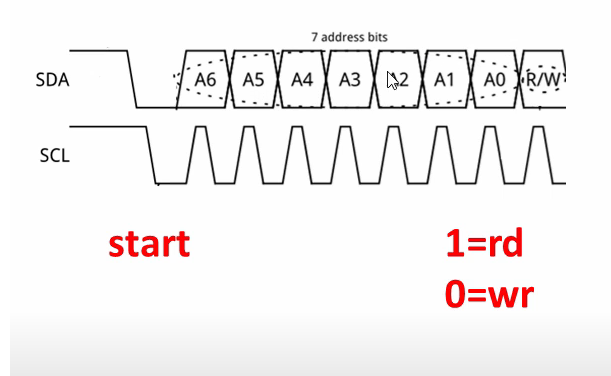

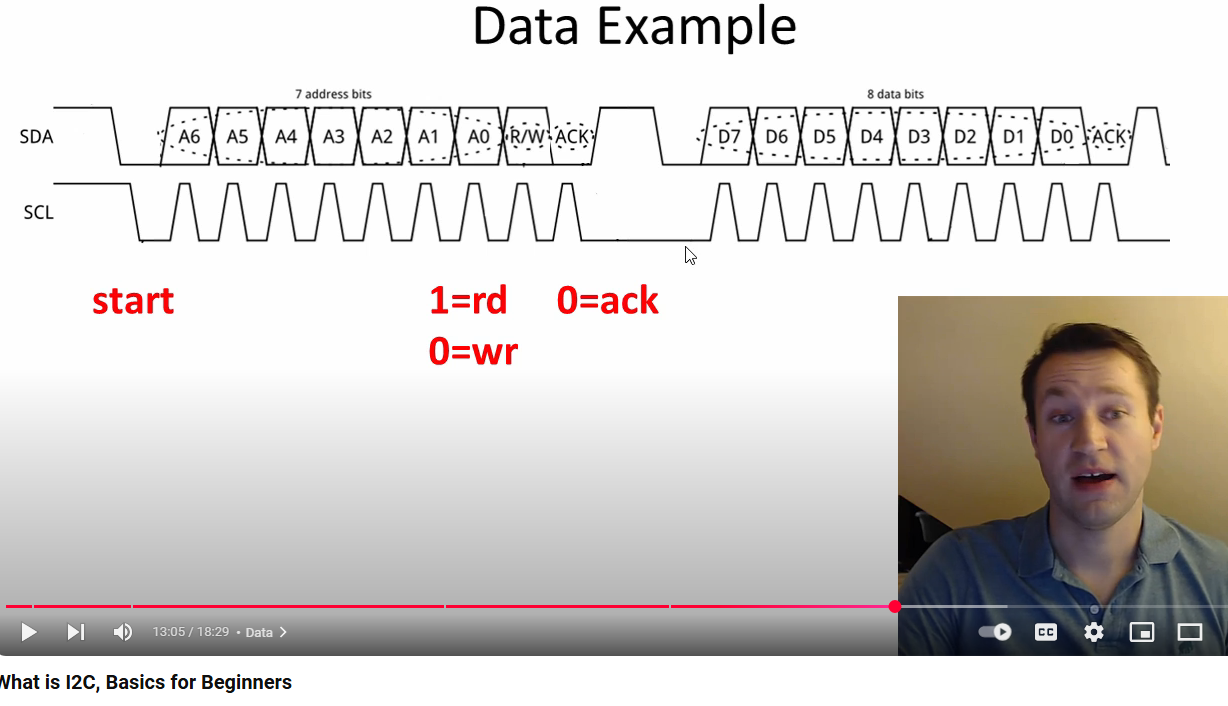






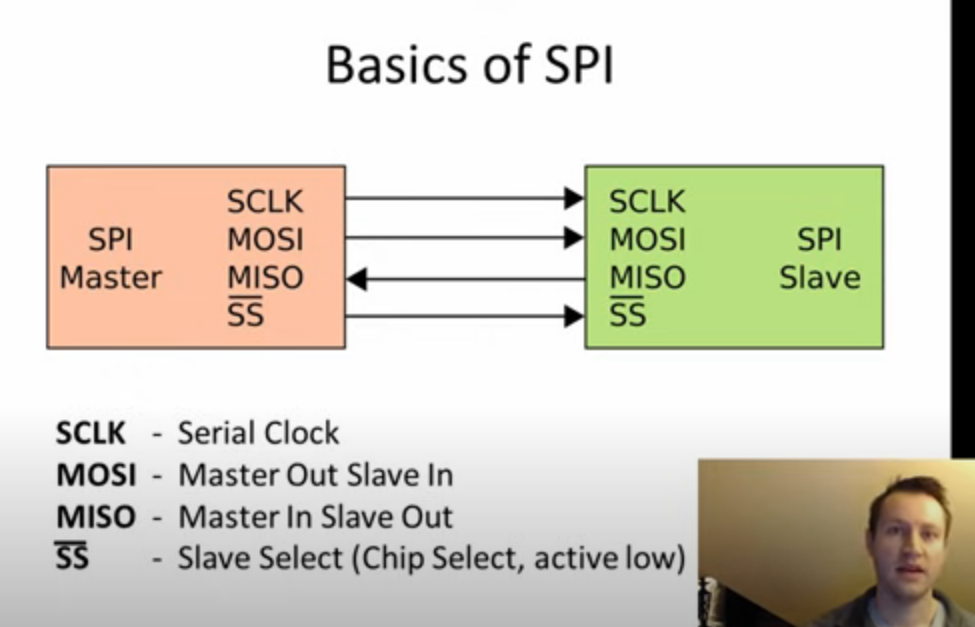
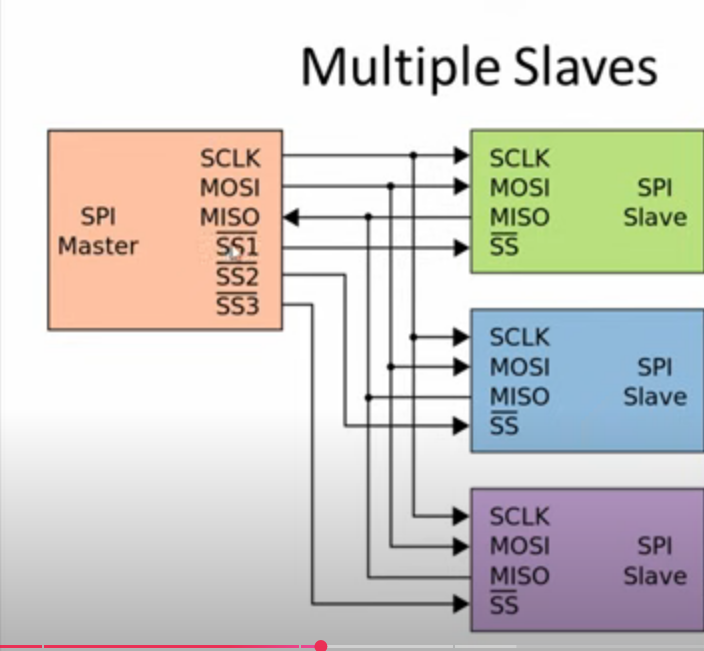

## Arithmetic

- Basic concepts
- Reference https://youtu.be/ys1ftk5a2A4?si=Vy6CiMJHJsJ8ZdYr
- DSP blocks used for super fast (say 250MHz+) multiply/adds
    - Synth tools can use other logic for multiplies, but DSP blocks much better at it
    - Multiply/accumulates where you multiply two numbers together and add something into them
        - Common in filters + other signal processing
- Arithmetic: 
    - what is bit growth when adding two 8b unsigned binary numbers
        - unsigned 8b number can be from 0 to 255
        - 8'b1111_1111 + 8'b1111_1111 = 9'b1_1111_1110 => so grows by 1 bit
    - and also for signed
        - signed 8b number can be from -128 to 127
        - let's make -128 => d'128 = 8'b1000_0000 => invert => 8'b0111_1111 => plus 1 => 8'b1000_0000
        - Try -128 + -128 = -256 = 9'b1_0000_0000 (so grows by 1 bit at most again)
    - try subtraction
        - 3-1 = 4'b0011 - 4'b0001 = 4'b0010
    - and multiplying
        - bit growth when multiplying 2 numbers is numbits(num1) + numbits(num2)
        - For example, unsigned numbers 255*3 = 8'b1111_1111 * 2'b11 = 10'b10_1111_1101
    - unsigned numbers: 
        - 4'b0001  = d'1
        - 4'b0101  = d'10
        - 4'b1111  = d'15
    
    - signed numbers - need two's complement. Take the number you want, invert bits, and add 1 to get a negative number. 
        - If want to represent d'6
            - take 4'b0110 => invert bits to get 4'b1001 => add 1 to get 4'b1010
        - If want to convert back to 6 => invert bits and add 1 
            - take 4'b1010 => invert bits to get 4'b0101 => add 1 to get 4'b0110
        - if have signed number, what is it in decimal?
            - 4'b1111 => 4'b0000 => 4'b0001 => so it's -1 in decimal
        - signed numbers can be positive and negative
            - Upper bit = 1 => negative
            - Upper bit = 0 => positive
        - Signed 4'b1010 -> 4'b0101 -> 4'b0110 -> -6!
    - Division is terrible in an FPGA, can only do it by 2
        - If have a lot of cycles, can keep dividing and taking remainder, and there are complicated (resources intensive) algorithms that can do it if you really need
    

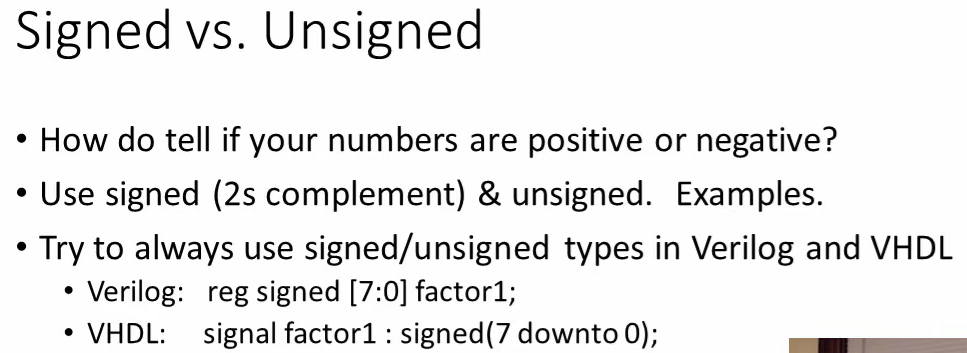
        
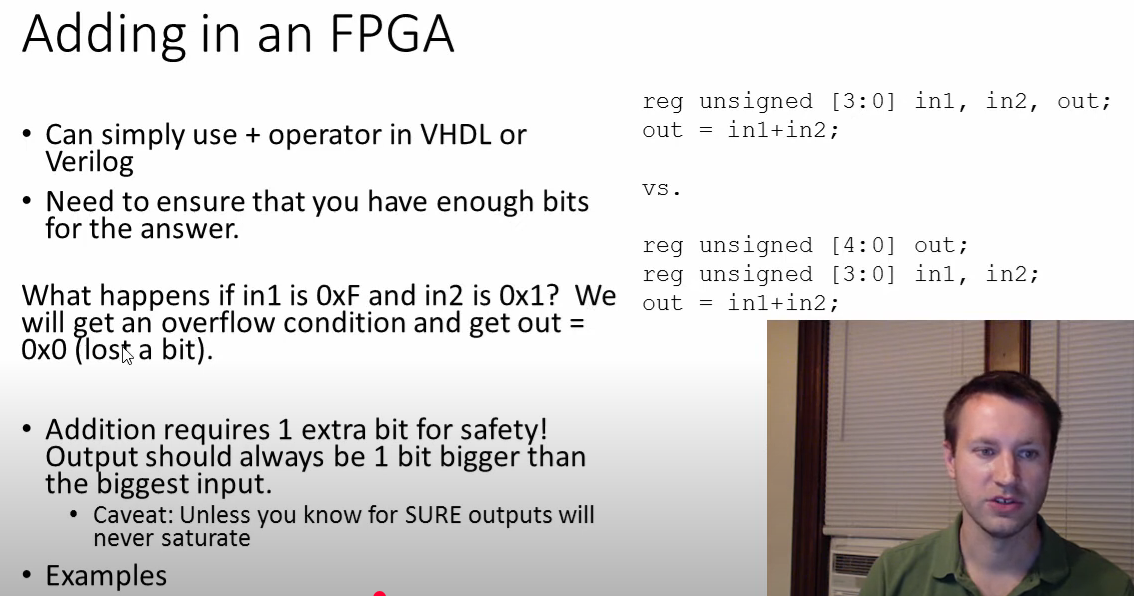

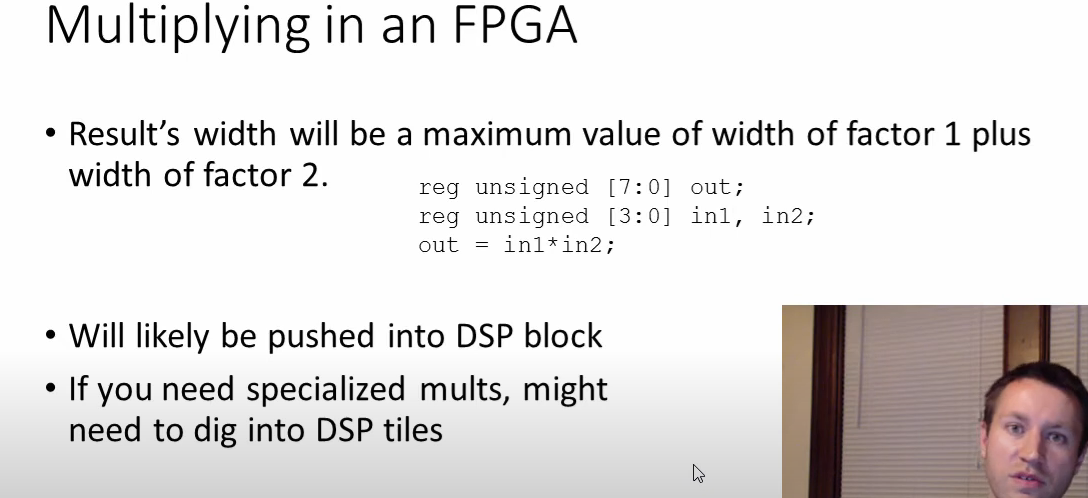


## EE stuff

- basic voltage and power laws
- things that can go wrong when debugging
- principles for high speed serial interfaces
    - DC balancing, singal integrity, channel loss, reflections, intersymbol interference, encoding schemes like 8b10b
    - SERDES high speed serial deserial IFs is generally things that run above 1Gbps
    - USed in PCIexpress, high speed video communications




## Python Practice

- Fibonacci problem - iteration, recursion, time and space complexity - done

## DSP Concepts

- Digital sampling of analog signals
- Nyquist frequency
- Representing signals in time/freq
    - delta function
    
    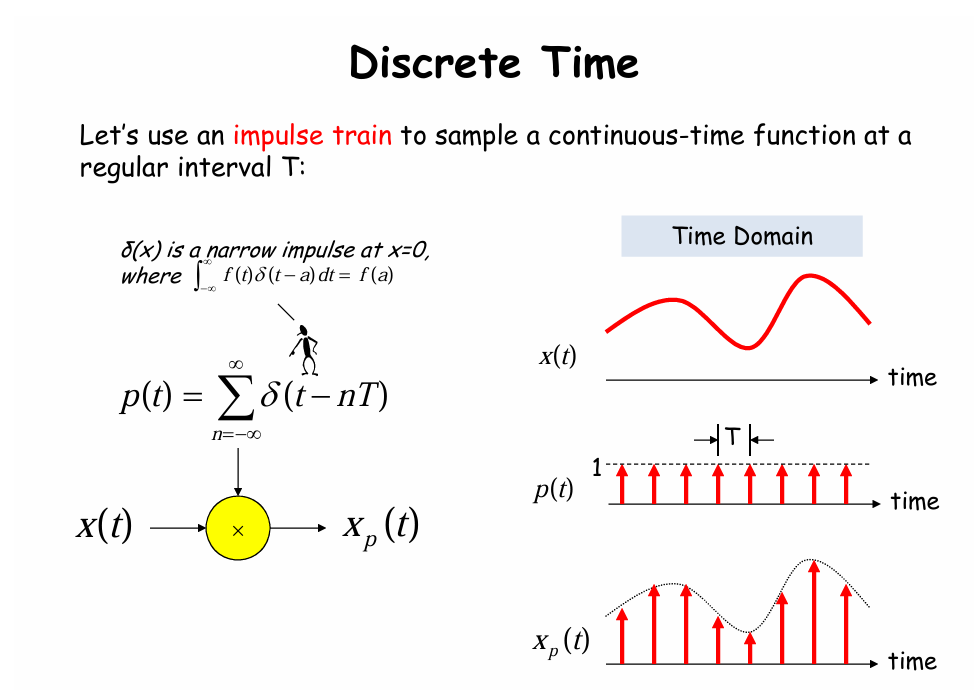
- Low pass filters
- N-tap FIR, filter coefficients
- FFTs


## Talking points for past projects

- Microsoft - pretty well hashed out
- brush up on this, especially the DBE